In [1]:
import pandas as pd
dataset = pd.read_csv("//Users/Asad/masterfile.csv")

In [11]:
dataset.shape

(4185, 8)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 8 columns):
Unnamed: 0               4185 non-null int64
Control-id               4185 non-null int64
Control-svid             4185 non-null int64
Control-cn0              4185 non-null float64
Control-agc              4185 non-null float64
Control-azimuth_deg      4185 non-null float64
Control-elevation_deg    4185 non-null float64
Control-constellation    4185 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 261.6+ KB


In [12]:
dataset.describe()

,Unnamed: 0,Control-id,Control-svid,Control-cn0,Control-agc,Control-azimuth_deg,Control-elevation_deg
count,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000
mean,2092.000000,2093.000000,15.925687,16.006452,-0.765121,172.376583,25.528076
std,1208.249767,1208.249767,9.500753,3.190948,2.621643,124.025408,20.193311
min,0.000000,1.000000,1.000000,7.100000,-10.220000,7.000000,2.000000
25%,1046.000000,1047.000000,9.000000,13.700000,-3.740000,53.000000,9.000000
50%,2092.000000,2093.000000,17.000000,15.900000,0.760000,217.000000,22.000000
75%,3138.000000,3139.000000,25.000000,18.000000,0.960000,274.000000,35.000000
max,4184.000000,4185.000000,31.000000,25.500000,2.230000,358.000000,72.000000


In [16]:
dataset.head()

,Unnamed: 0,Control-id,Control-svid,Control-cn0,Control-agc,Control-azimuth_deg,Control-elevation_deg,Control-constellation
0,0,1,22,25.5,-0.14,248.0,16.0,GPS
1,1,2,22,25.5,0.46,248.0,16.0,GPS
2,2,3,22,19.6,1.59,248.0,16.0,GPS
3,3,4,25,24.1,1.59,54.0,14.0,GPS
4,4,5,2,17.9,1.24,18.0,4.0,GPS


In [21]:
# Including only numeric variables
list(set(dataset.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [23]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,Control-id,Control-svid,Control-cn0,Control-agc,Control-azimuth_deg,Control-elevation_deg
0,0,1,22,25.5,-0.14,248.0,16.0
1,1,2,22,25.5,0.46,248.0,16.0
2,2,3,22,19.6,1.59,248.0,16.0
3,3,4,25,24.1,1.59,54.0,14.0
4,4,5,2,17.9,1.24,18.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1186d1b70>,
      dtype=object)

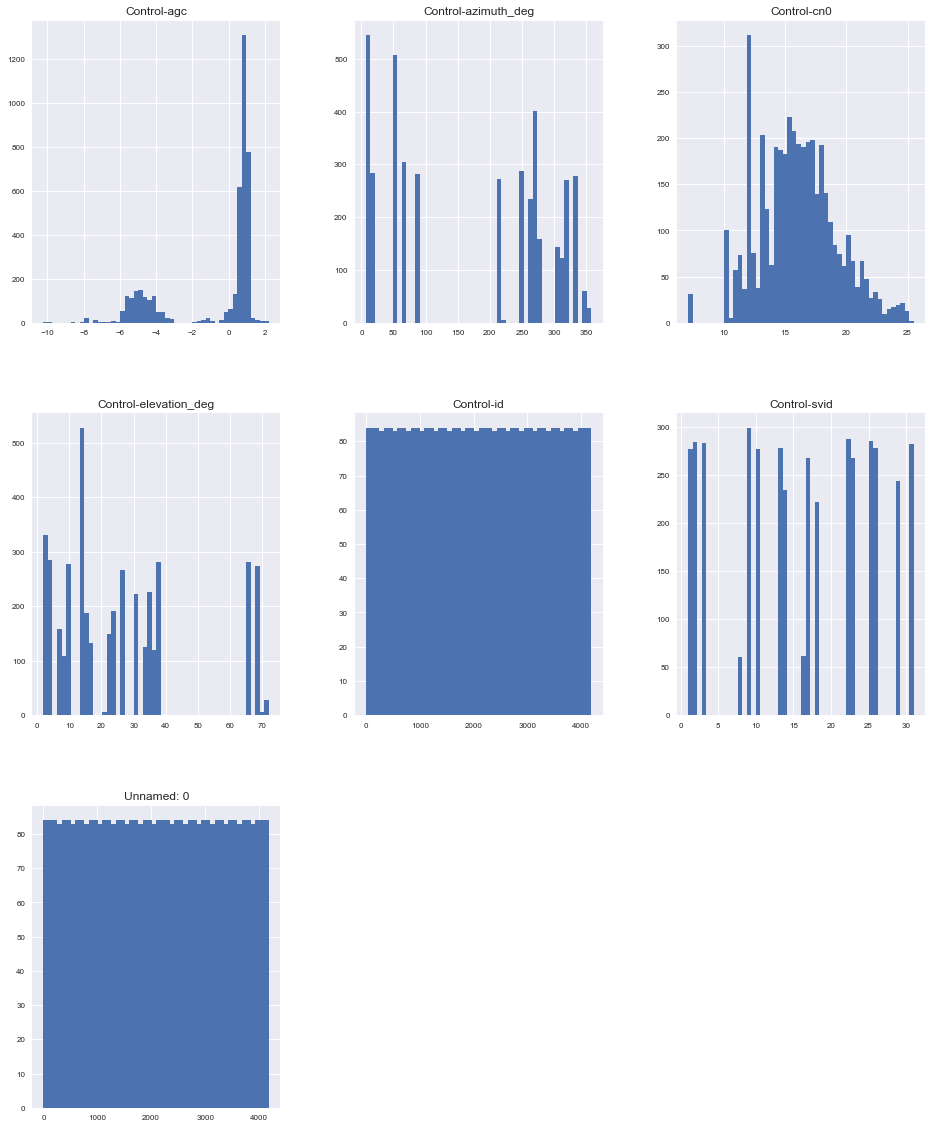

In [24]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [25]:
# Correlation between the numeric variables

print(df_num.corr())

                       Unnamed: 0  Control-id  Control-svid  Control-cn0  \
Unnamed: 0               1.000000    1.000000      0.025352    -0.076782   
Control-id               1.000000    1.000000      0.025352    -0.076782   
Control-svid             0.025352    0.025352      1.000000    -0.027494   
Control-cn0             -0.076782   -0.076782     -0.027494     1.000000   
Control-agc             -0.044591   -0.044591      0.299337     0.387869   
Control-azimuth_deg     -0.023402   -0.023402     -0.298401    -0.112356   
Control-elevation_deg    0.018292    0.018292      0.576763    -0.221207   

                       Control-agc  Control-azimuth_deg  Control-elevation_deg  
Unnamed: 0               -0.044591            -0.023402               0.018292  
Control-id               -0.044591            -0.023402               0.018292  
Control-svid              0.299337            -0.298401               0.576763  
Control-cn0               0.387869            -0.112356            

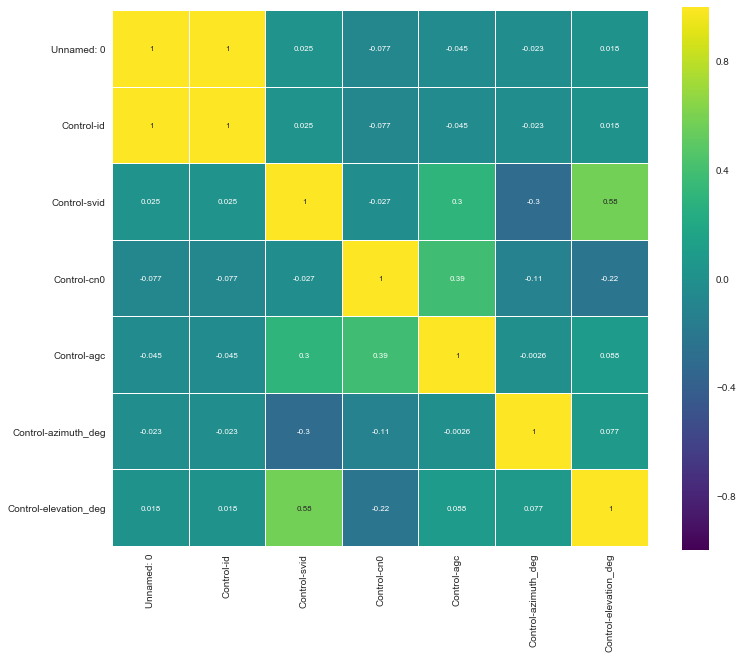

In [46]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [47]:
df_num_corr = df_num.corr()['Control-elevation_deg'][:-1] # -1 because the latest row is elevation_deg
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Elevation_deg:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Elevation_deg:
Control-svid    0.576763
Name: Control-elevation_deg, dtype: float64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

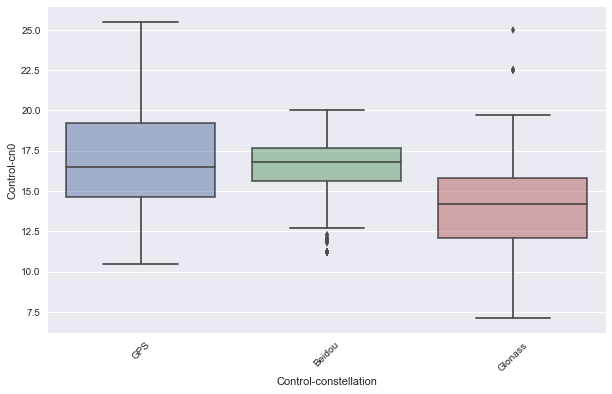

In [50]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Control-constellation', y='Control-cn0', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

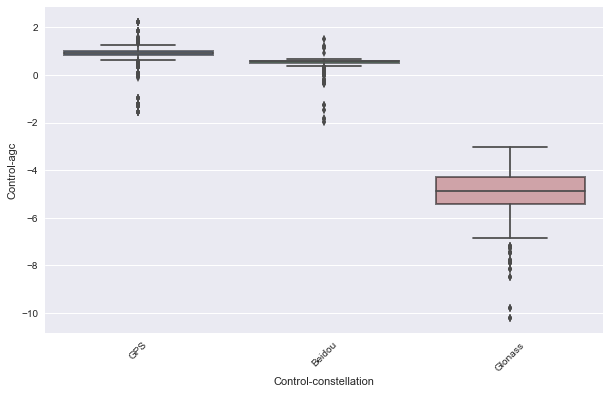

In [51]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Control-constellation', y='Control-agc', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

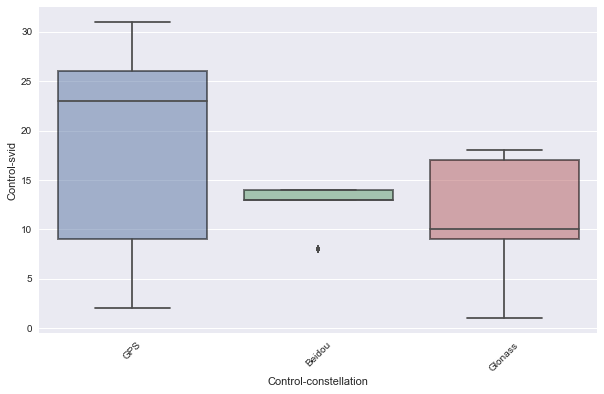

In [52]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Control-constellation', y='Control-svid', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

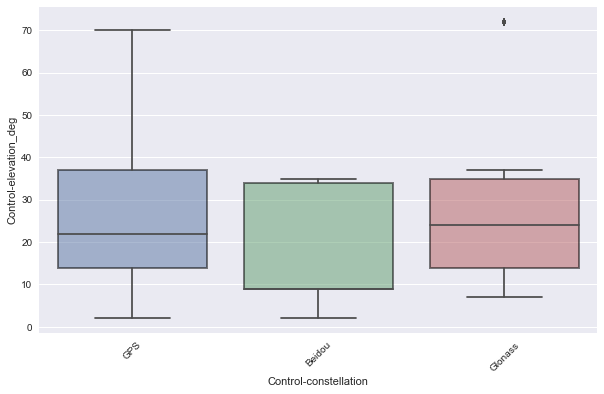

In [53]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Control-constellation', y='Control-elevation_deg', data=dataset)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)